In [2]:
# Use tensorflow 2.x version

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
def create_dataset(dataset, look_back=1):
	X = []
	Y = []
	
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		X.append(a)
		Y.append(dataset[i + look_back, 0])
	
	return np.array(X), np.array(Y)

np.random.seed(7)

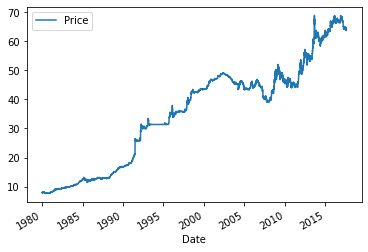

In [4]:
dataset = data = pd.read_csv("./USD_INR.csv", index_col="Date")
dataset.index = pd.to_datetime(dataset.index)
dataset = dataset[["Price"]]
dataset = dataset.sort_index()
data = data.sort_index()

dataset.plot()
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [6]:
model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=2)

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

trainRMSE = math.sqrt(mean_squared_error(Y_train[0], trainPredict[:,0]))
testRMSE = math.sqrt(mean_squared_error(Y_test[0], testPredict[:,0]))

print()
print(f'Train RMSE: {trainRMSE}%')
print(f'Test RMSE: {testRMSE}%')

Epoch 1/10
7755/7755 - 11s - loss: 0.0091
Epoch 2/10
7755/7755 - 9s - loss: 1.6112e-05
Epoch 3/10
7755/7755 - 11s - loss: 1.4820e-05
Epoch 4/10
7755/7755 - 10s - loss: 1.4382e-05
Epoch 5/10
7755/7755 - 9s - loss: 1.3190e-05
Epoch 6/10
7755/7755 - 9s - loss: 1.2804e-05
Epoch 7/10
7755/7755 - 10s - loss: 1.2384e-05
Epoch 8/10
7755/7755 - 9s - loss: 1.1994e-05
Epoch 9/10
7755/7755 - 9s - loss: 1.1440e-05
Epoch 10/10
7755/7755 - 10s - loss: 1.1491e-05

Train RMSE: 0.20058615913957165%
Test RMSE: 1.4376714352025526%


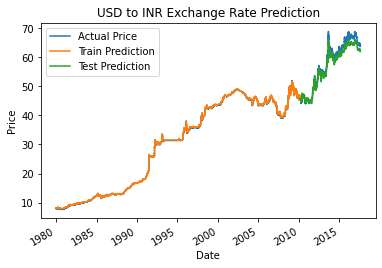

In [7]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[ : , : ] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, : ] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[ : , : ] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, : ] = testPredict

data["Price"].plot(label="Actual Price")
plt.plot(data.index, trainPredictPlot, label="Train Prediction")
plt.plot(data.index, testPredictPlot, label="Test Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("USD to INR Exchange Rate Prediction")
plt.legend()
plt.show()

# The LSTM RNN Model able to predict the test data. The prediction is not far from the actual price.